In [71]:
import pandas as pd
import numpy as np
import re
import datetime
from scipy.stats import chisquare

In [2]:
#read csv
BF=pd.read_csv("Battlefieldreviews.csv")

In [78]:
#look at data
BF.head(5)

,Unnamed: 0,helpful,recommendations,hours,review,date,Help,funny,Month,Day,Year,HoursBinned
0,0,No one has rated this review as helpful yet0,Recommended,95.9,"Pretty good now, shame it took this long to ge...",27 January,0.0,0.0,January,27,2023.0,"(93.95, 7570.1]"
1,1,No one has rated this review as helpful yet0,Recommended,1.0,surprisingly good! Shields are OP :) one hit k...,27 January,0.0,0.0,January,27,2023.0,"(0.099, 12.4]"
2,2,No one has rated this review as helpful yet0,Recommended,5.5,"i got this game today, and played 5.5 hours st...",27 January,0.0,0.0,January,27,2023.0,"(0.099, 12.4]"
3,3,1 person found this review helpful0,Recommended,54.8,started out rough but the game has really turn...,27 January,1.0,0.0,January,27,2023.0,"(40.2, 93.95]"
4,4,1 person found this review helpful0,Recommended,35.6,Fun game,27 January,1.0,0.0,January,27,2023.0,"(12.4, 40.2]"


In [4]:
#remove \t from review column
BF['review']=BF.apply(lambda row: re.sub("\t","",str(row['review'])),axis =1)

In [5]:
#split X amount of people found this helpful and Y amount of people found this funny 
BF[["Help","funny"]]=BF["helpful"].str.split(n=1,expand= True)

In [6]:
#Remove all letters from Help
BF['Help']=BF.apply(lambda row: re.sub("[A-z]","",str(row['Help'])),axis =1)

In [7]:
#remove all letters from funny
BF['funny']=BF.apply(lambda row: re.sub("[A-z]","",str(row['funny'])),axis =1)

In [8]:
#remove all letters froms hours
BF['hours']=BF.apply(lambda row: re.sub("[A-z]","",str(row['hours'])),axis =1)

In [9]:
# remove spaces in hours
BF['hours']=BF.apply(lambda row: re.sub(" ","",str(row['hours'])),axis =1)

In [10]:
#remove ',' from hours
BF['hours']=BF.apply(lambda row: re.sub(",","",str(row['hours'])),axis =1)

In [11]:
#covert string to float
BF["hours"]=BF["hours"].astype("float")

In [12]:
#remove posted from date
BF["date"] = BF.apply(lambda row: re.sub("Posted: ","",str(row["date"])),axis =1)

In [13]:
#extract month from date and put it in its column
BF["Month"]=BF.apply(lambda row : re.search("[A-z]+", str(row["date"])).group(),axis =1)
BF["Month"].unique()

array(['January', 'December', 'November', 'October', 'September',
       'August', 'July', 'June', 'May', 'April', 'March', 'February'],
      dtype=object)

In [14]:
#extract day from date
BF["Day"]=BF.apply(lambda row : re.search("[0-9]+", str(row["date"])).group(),axis =1)
BF["Day"].unique()

array(['27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17',
       '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5',
       '4', '3', '2', '1', '31', '30', '29', '28'], dtype=object)

In [15]:
#extract year from date
BF["Year"]=BF.apply(lambda row : re.search("[0-9]*$", str(row["date"])).group(),axis =1)

In [16]:
#remove days from the years column
BF["Year"]=BF["Year"].str.replace("^..$|^.$","")

C:\Users\bobby\AppData\Local\Temp\ipykernel_8668\552455930.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  BF["Year"]=BF["Year"].str.replace("^..$|^.$","")


In [17]:
#convert year to numeric and fill the nas with 2023 year
BF["Year"]=pd.to_numeric(BF["Year"]).fillna(2023)

In [18]:
#change help from string to float
BF["Help"]=pd.to_numeric(BF["Help"].str.replace(",","")).fillna(0)

In [89]:
# remove all letters and special charactors and convert string into numeric
BF["funny"]=BF["funny"].str.replace("<.*","")
BF["funny"]=BF["funny"].str.strip()
BF["funny"]=BF["funny"].str.replace("[A-z][0-9]","")
BF["funny"]=BF["funny"].str.replace(" [0-9]$","")
BF["funny"]=BF["funny"].str.replace(",","")
BF["funny"]=pd.to_numeric(BF["funny"])
BF["funny"]=BF["funny"].fillna(0)

AttributeError: Can only use .str accessor with string values!

In [30]:
#looking at data
BF.describe()

,Unnamed: 0,hours,Help,funny,Year
count,53547.000000,53547.000000,53547.000000,51188.000000,53547.000000
mean,26773.000000,79.308611,5.103180,2.077264,2021.614376
std,15457.831769,136.645217,104.535163,66.637397,0.532025
min,0.000000,0.100000,0.000000,0.000000,2021.000000
25%,13386.500000,12.400000,0.000000,0.000000,2021.000000
50%,26773.000000,40.200000,1.000000,0.000000,2022.000000
75%,40159.500000,93.950000,2.000000,0.000000,2022.000000
max,53546.000000,7570.100000,12385.000000,8990.000000,2023.000000


array([[<AxesSubplot:title={'center':'hours'}>,
        <AxesSubplot:title={'center':'Help'}>],
       [<AxesSubplot:title={'center':'funny'}>, <AxesSubplot:>]],
      dtype=object)

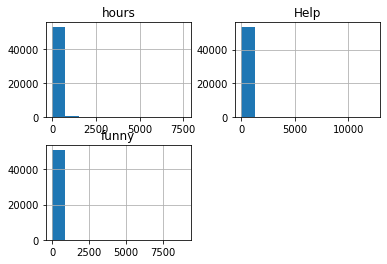

In [33]:
BF[["hours","Help","funny"]].hist()

<AxesSubplot:>

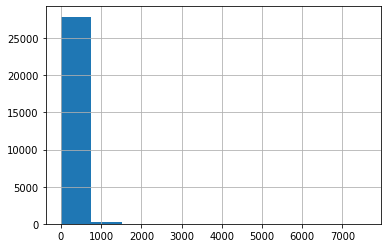

In [43]:
#Majority of players that recommended the game are between 0 to 600 hours played
BF.loc[BF["recommendations"]== 'Recommended']["hours"].hist()

<AxesSubplot:>

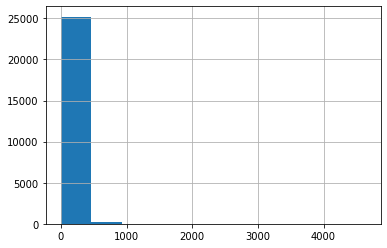

In [48]:
#Majority of players that do not recommended the game are between 0 to 600 hours played
BF.loc[BF["recommendations"]== 'Not Recommended']["hours"].hist()

In [79]:
#HoursBinned
BF["HoursBinned"]=pd.qcut(BF["hours"],q=4)
BF["HoursBinned"]

0        (93.95, 7570.1]
1          (0.099, 12.4]
2          (0.099, 12.4]
3          (40.2, 93.95]
4           (12.4, 40.2]
              ...       
53542      (0.099, 12.4]
53543      (0.099, 12.4]
53544      (0.099, 12.4]
53545      (0.099, 12.4]
53546       (12.4, 40.2]
Name: HoursBinned, Length: 53547, dtype: category
Categories (4, interval[float64, right]): [(0.099, 12.4] < (12.4, 40.2] < (40.2, 93.95] < (93.95, 7570.1]]

In [94]:
#Hoursbinned and recommendations 
c=BF.groupby(["HoursBinned","recommendations"]).count().reset_index()
c

,HoursBinned,recommendations,Unnamed: 0,helpful,hours,review,date,Help,funny,Month,Day,Year
0,"(0.099, 12.4]",Not Recommended,10137,10137,10137,10137,10137,10137,10137,10137,10137,10137
1,"(0.099, 12.4]",Recommended,3257,3257,3257,3257,3257,3257,3257,3257,3257,3257
2,"(12.4, 40.2]",Not Recommended,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285
3,"(12.4, 40.2]",Recommended,7111,7111,7111,7111,7111,7111,7111,7111,7111,7111
4,"(40.2, 93.95]",Not Recommended,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
5,"(40.2, 93.95]",Recommended,8372,8372,8372,8372,8372,8372,8372,8372,8372,8372
6,"(93.95, 7570.1]",Not Recommended,4030,4030,4030,4030,4030,4030,4030,4030,4030,4030
7,"(93.95, 7570.1]",Recommended,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357


In [124]:
#calculate chisquare test for hours played and recommendate, the more hours somone has 
#the more likely they would recommend this game
NumberofNonRecommended=c[c["recommendations"]== "Not Recommended"]["helpful"].to_numpy()
NumberofRecommended=c[c["recommendations"]== "Recommended"]["helpful"].to_numpy()

d=np.array([NumberofNonRecommended,NumberofRecommended]).T
chisquare(d)

Power_divergenceResult(statistic=array([3387.8621611 , 3054.82446525]), pvalue=array([0., 0.]))

<AxesSubplot:xlabel='hours', ylabel='Help'>

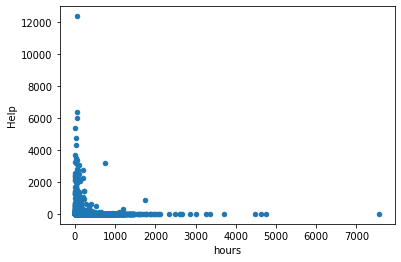

In [49]:
#there is no correlation between hours played and if the review was helpful for some people
BF.plot.scatter(x = "hours",
               y="Help")

<AxesSubplot:xlabel='hours', ylabel='funny'>

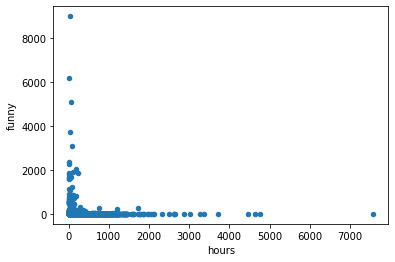

In [58]:
#there is no correlation between hours played and if the review was funny for some people
BF.plot.scatter(x = "hours",
               y="funny")

<AxesSubplot:xlabel='funny', ylabel='Help'>

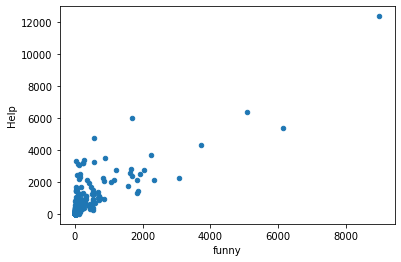

In [91]:
#seems to be correlation between Helpful and funny
BF.plot.scatter(x = "funny",
               y="Help")